# Actividade 3: Espectroscopia de rochas - calibração para o lítio

Neste notebook vamos tentar calibrar a intensidade do sinal em função da quantidade de lítio presente na amostra.

In [1]:
#importar as duas bibliotecas já introduzidas no passado
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np

#importar outras bibliotecas necessárias para as funções que vamos definir
import requests
import re


def read_libs_data(filename):
  """
  Função usada para ler dados de ficheiros do LIBS fornecidos.
  Retorna wavelenghts, intensidades
  """
  data = np.loadtxt(filename)
  return data[:,0], data[:,1]

def scrap_element(element):
  """
  Função usada para aceder a espectros de elementos da base de dados da NIST.
  Retorna wavelenghts, intensidades normalizadas
  """

  URL = "https://physics.nist.gov/cgi-bin/ASD/lines1.pl?composition="+element+"%3A100&mytext%5B%5D="+element+"&myperc%5B%5D=100&spectra="+element+"0-2&low_w=300&limits_type=0&upp_w=900&show_av=2&unit=1&resolution=2000&temp=1&eden=1e17&maxcharge=2&min_rel_int=0.01&libs=1"
  page = requests.get(URL)

  lista = page.text.split('var dataDopplerArray=')[1].split(';')[0].replace('],',']').replace('null','0').split('\n')[1:]
  
  x = []
  y = []
  for i in lista:
    x.append(float(i.replace('[','').replace(']','').split(",")[0]))
    y.append(float(i.replace('[','').replace(']','').split(",")[1]))

  return x,y/np.max(y)

O primeiro passo é confirmar a existência de lítio nas amostras rock_#.txt fornecidas.

O segundo passo será determinar a intensidade das linhas referentes ao Lítio para cada amostra. Para isto temos de escolher uma zona de interesse e vamos determinar o máximo nessa zona de interesse utilizando uma função que vamos definir:

In [3]:
def procura_maximo(x_lim_esq, x_lim_dir, dados_x, dados_y):
  """
  
  Funcao que procura o maximo do conjunto de dados_y nos limites inferior e superior dados por
  x_lim_esq e x_lim_dir

  """
  #encontrar a zona de interesse
  index_esq = 0
  index_dir = 0
  for i in range(0,len(dados_x)):
    
    if dados_x[i]>x_lim_esq:
      if index_esq == 0:
        index_esq = i
    
    if dados_x[i]>x_lim_dir:
      if index_dir == 0:
        index_dir = i


  return np.max(dados_y[index_esq:index_dir]),dados_x[index_esq:index_dir][np.argmax(dados_y[index_esq:index_dir])]

#ler o ficheiro do solo_1
wavelengths_rock_1, spectrum_rock_1 = read_libs_data('rock_1.txt')


maximo_610, wavelength_max_610 = procura_maximo(600,620, wavelengths_rock_1, spectrum_rock_1)

print(maximo_610)
print(wavelength_max_610)

plt.subplots(figsize=[15,5])
plt.title("Spectrum Analysis of Soil Sample 1")
plt.plot(wavelengths_rock_1,spectrum_rock_1, color='k', label = 'Soil 1')
plt.scatter(wavelength_max_610,maximo_610,label='Detected Max.',marker='o',s=40,color='r')
plt.legend()
plt.xlim(600,620)
plt.ylim(0,2000)

OSError: ignored

Repetem para outra linha do lítio...

Quando eles acabarem deve dar algo deste género(ou seja isto não é para mostrar)...provavelmente ainda vou substituir amostras para ficarem melhor

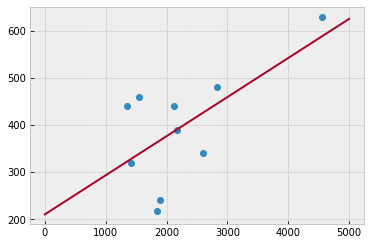

In [8]:
#ler o ficheiro do solo_1
concentracoes = [240,217,340,440,630,480,390,320,460,440]
intensidades = []
for i in range(1,11):
  wavelengths_rock_1, spectrum_rock_1 = read_libs_data('rock_'+str(i)+'.txt')
  maximo_610, wavelength_max_610 = procura_maximo(600,620, wavelengths_rock_1, spectrum_rock_1)
  intensidades.append(maximo_610)

plt.subplots()
plt.plot(valores_y,concentracoes,'o')

#fazer o fit
from sklearn import *
model=linear_model.LinearRegression()
model.fit(np.array(intensidades).reshape(-1, 1),np.array(concentracoes).reshape(-1, 1))
declive = model.coef_[0]
intercept = model.intercept_[0]
plt.plot(np.arange(0,5000),np.arange(0,5000)*declive + intercept,ls='-')

In [9]:
model.intercept_[0]

210.16131372937244